# PLOT INSOLATION

In [1]:
import xarray as xr
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
import intake, intake_esm
import os
import sys
from pathlib import Path
from glob import glob
import itertools
import time
import seaborn as sns
import math
import scipy.stats as st
import requests

import warnings
warnings.filterwarnings('ignore')

%run functions.ipynb

In [6]:
'''
Nécessite les jeux de données suivant pour être tourné.
Mais vous pouvez utiliser le script pour vious aider à faire des figures type.
'''

insol = pd.read_csv('/home/bchaigneau/Stage_LSCE/datas/insolation.csv', sep = ';')
co2 = pd.read_csv('/home/bchaigneau/Stage_LSCE/datas/Data_CO2.csv', sep = ';')
sl = pd.read_csv('/home/bchaigneau/Stage_LSCE/datas/sealevel.csv', sep = ',')

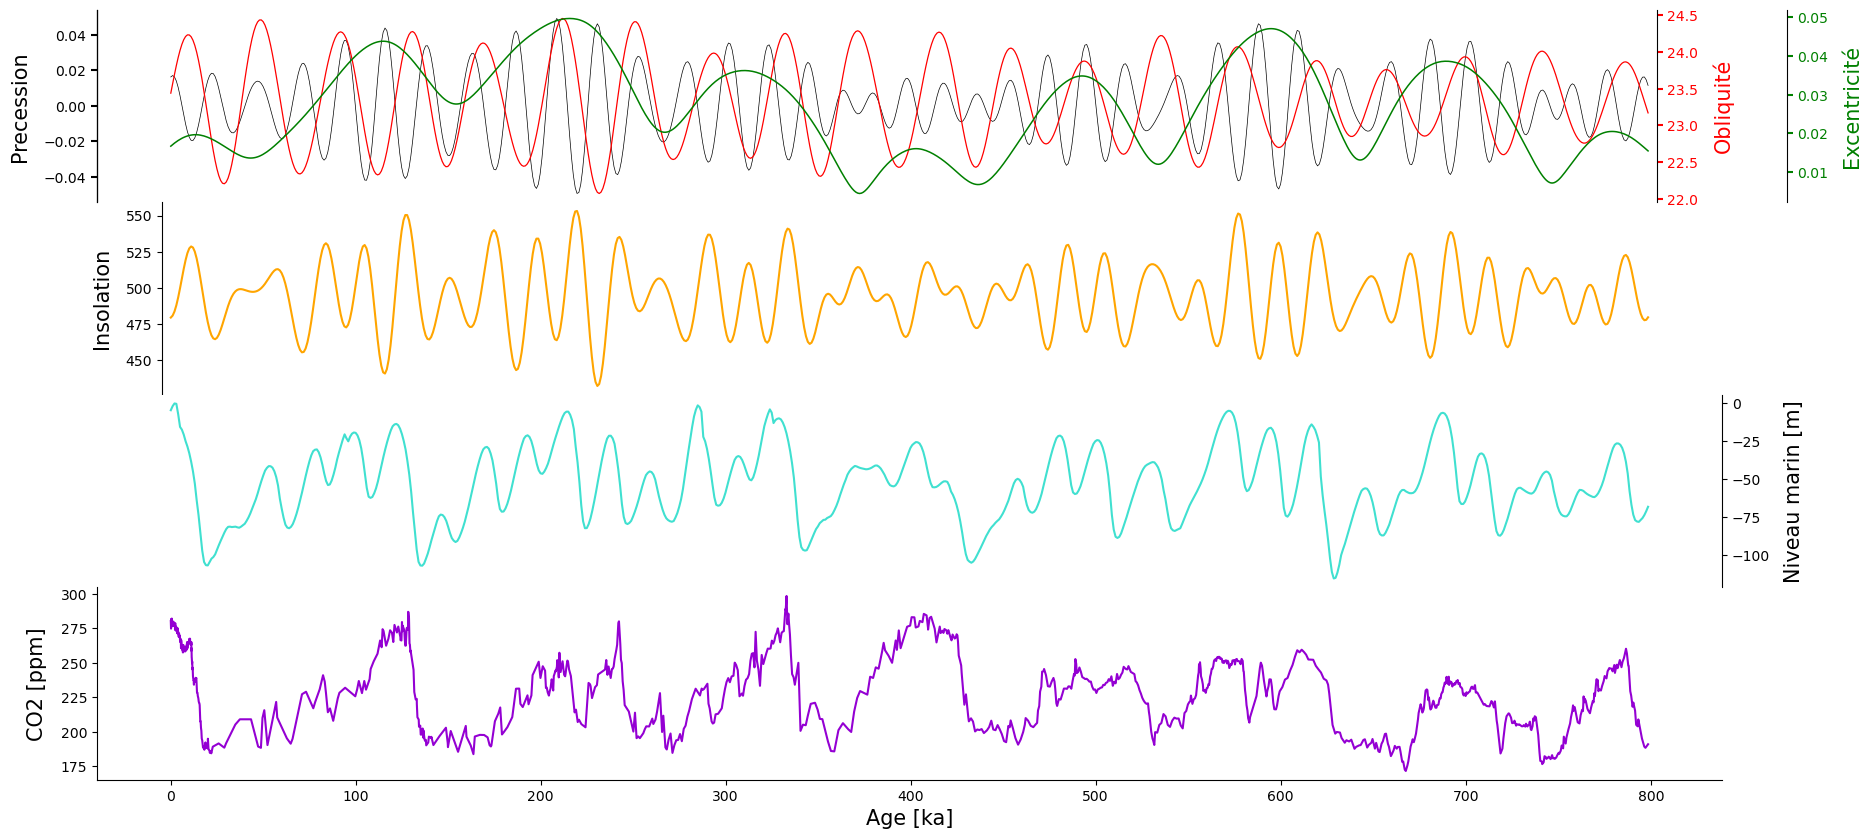

In [22]:
'''
Plot de plusieurs courbes liées à l'insolation.

Les étapes : 
    - On supprime les paramètres de figure matplotlib qui seraient conservées en fond.
    - On initialise la figure (nombre de lignes et de colones)
    - On créer des twins qui seront sur la même ligne (p1, p2, p3 sur la même ligne)
    - On ajuste le style, les labels, les ticks
    - On enregistre
'''


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


fig, axs = plt.subplots(
    figsize=(26, 10),
    nrows = 4,
    ncols = 1
    )
fig.subplots_adjust(right=0.75)
plt.subplots_adjust(wspace=0, hspace=0)

twin1 = axs[0].twinx()
twin2 = axs[0].twinx()


twin1.spines.right.set_position(("axes", 0.96))
twin2.spines.right.set_position(("axes", 1.04))


p1, = axs[0].plot(insol.age, insol.precession, "black", linewidth = 0.5, label="Precession")
p2, = twin1.plot(insol.age, insol.obliquite, "r-", linewidth = 0.9, label="Obliquité")
p3, = twin2.plot(insol.age, insol.excentricite, "g-", linewidth = 1.1, label="Excentricité")


axs[0].set_ylabel("Precession", fontsize = 15, labelpad = 10)
twin1.set_ylabel("Obliquité", fontsize = 15, labelpad = 10)
twin2.set_ylabel("Excentricité", fontsize = 15, labelpad = 10)

axs[0].yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
axs[0].tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
axs[0].spines['top'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_xticklabels([])
axs[0].set_xticks([])   
twin1.spines['top'].set_visible(False)
twin1.spines['bottom'].set_visible(False)
twin2.spines['top'].set_visible(False)
twin2.spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)


axs[1].plot(insol.age, insol.insolation, color = 'orange')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticklabels([])
axs[1].set_xticks([])   
#axs[1].spines.right.set_position(("axes", 1))
axs[1].set_ylabel('Insolation', fontsize = 15, labelpad = 10)
axs[1].spines.left.set_position(("axes", 0.04))


axs[2].plot(sl.Age*1000, sl['sea level'], color = 'turquoise')
axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()
axs[2].spines['top'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].set_ylabel('Niveau marin [m]', fontsize = 15, labelpad = 10)
axs[2].set_xlabel('Age [ka]', fontsize = 15)


axs[3].plot(co2.Age, co2.CO2, color = 'darkviolet')
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].set_ylabel('CO2 [ppm]', fontsize = 15, labelpad = 10)
axs[3].set_xlabel('Age [ka]', fontsize = 15)


plt.savefig('/home/bchaigneau/Stage_LSCE/plot/Insolation/insolation&sl&co2_figure.jpeg', dpi = 200)
plt.show()